In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
dataset = pd.read_csv('../../datasets/regression/SVR/Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Determine feature and dependent variable

In [4]:
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

### Feature scaling

we need to do this for SVR

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc_X = StandardScaler()
sc_Y = StandardScaler()

X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

/home/arif/Github/machine-learning-a-z/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/arif/Github/machine-learning-a-z/env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/arif/Github/machine-learning-a-z/env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.war

### Fitting SVR to the dataset

In [19]:
from sklearn.svm import SVR

In [20]:
regressor = SVR(kernel='rbf')

In [21]:
regressor.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Visualizing the result

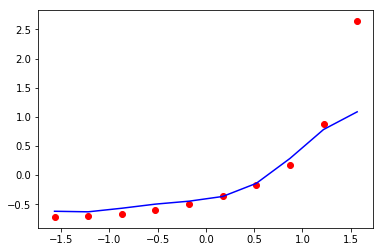

In [23]:
plt.scatter(X,Y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.show()

### Predicting the result

Before we predict the result, we need to scale the value of interest first.

In [28]:
scaled_value = sc_X.fit_transform(np.array([6.5]))
scaled_value

/home/arif/Github/machine-learning-a-z/env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/arif/Github/machine-learning-a-z/env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 0.])

In [29]:
y_pred = regressor.predict(scaled_value)
y_pred

/home/arif/Github/machine-learning-a-z/env/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([-0.41686141])

The result looks doesn't right. It is because we need to transform the result back to its normal value

In [30]:
y_pred = sc_Y.inverse_transform(y_pred)
y_pred

array([ 131106.77303274])